# This is the EDA for the AllState dataset. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 1. The label - Loss
**In this section, we would like to know anything interesting about the label, e.g. the histogram, any extreme values, missing values.**

In [3]:
# load train.csv and understand what the columns are
trainDf = pd.read_csv('../input/train.csv')
print('Num of columns: {}'.format(trainDf.dtypes.size))
print('The columns are:\n')
print(trainDf.info())

Num of columns: 132
The columns are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB
None


**First examine the original loss value. There is no null values, and the raw values are positively skewed. We may try to transfer the values with log1p.**

Num of NULL: 0
Descriptive statyistics:

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64




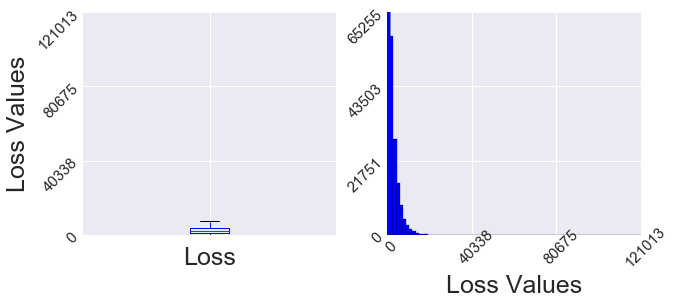

In [4]:
# Examine boxplot and histogram of the raw data
rawLoss = trainDf.loss
# check if null exists
print('Num of NULL: {}'.format(sum(rawLoss.isnull())))
## print(rawLabel.isnull().any())

# check the descriptive statistics
print('Descriptive statyistics:\n')
desLoss = rawLoss.describe()
print(desLoss)
print('\n')

# functions to set ticks and ticklabels
def setBoxPlt(ticks,ax,xlab,ylab,xticklabels=''):
    ax.set_ylabel(ylab,fontsize=25)
    ax.set_xticklabels(xticklabels,fontsize=15)
    ax.set_xlabel(xlab[:],fontsize=25)
    ax.set_ylim(np.min(ticks),np.max(ticks))
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks,fontsize = 15,rotation=45,rotation_mode='anchor');
def setHistPlt(ticks,ax,xlab,hgram):
    ax.set_xlabel(xlab,fontsize=25)
    ax.set_xlim(np.min(ticks),np.max(ticks))
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks,fontsize = 15,rotation=45,rotation_mode = 'anchor');
    freqLabels = np.linspace(hgram[0].min(),hgram[0].max(),4).astype(int)
    ax.set_ylim(np.min(freqLabels),np.max(freqLabels))
    ax.set_yticks(freqLabels)
    ax.set_yticklabels(freqLabels,fontsize=15,rotation=45,rotation_mode = 'anchor');

# set the figure and axes
f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
lossTicks = np.round(np.linspace(np.floor(rawLoss.min()),np.ceil(rawLoss.max()),num=4),decimals=0).astype(int)
# plot the boxplot
bplot = ax1.boxplot(rawLoss)
setBoxPlt(lossTicks,ax1,'Loss','Loss Values')
 # plot the histogram
hgram = ax2.hist(rawLoss,bins=80, color='b')
setHistPlt(lossTicks,ax2,'Loss Values',hgram)

**The log1p transformed Loss values are perfect Gaussian, however, there are 6932 outliers further than 2 standard deviations from the mean. We will seperate trainDf into tSamplesDf and outliersDf, and study them seperately.**

Descriptive statistics:

count    188318.000000
mean          7.685908
std           0.811309
min           0.512824
25%           7.094617
50%           7.657552
75%           8.259729
max          11.703655
Name: loss, dtype: float64




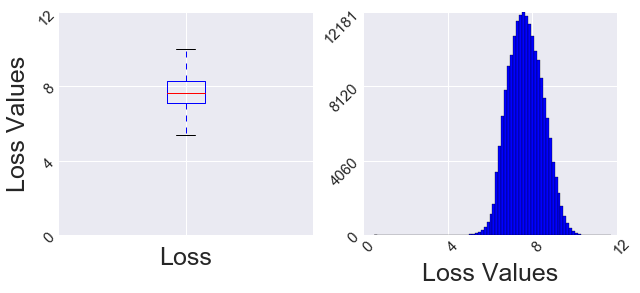

In [5]:
# Examine boxplot and histogram of the log1p transformed data
log1pLoss = np.log1p(rawLoss)

# check the descriptive statistics
print('Descriptive statistics:\n')
desLoss = log1pLoss.describe()
print(desLoss)
print('\n')

# set the figure and axes
f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
log1pticks = np.round(np.linspace(np.floor(log1pLoss.min()),np.ceil(log1pLoss.max()),num=4),decimals=0).astype(int)
# plot the boxplot
bplot = ax1.boxplot(log1pLoss)
setBoxPlt(log1pticks,ax1,'Loss','Loss Values')
# plot the histogram
hgram = ax2.hist(log1pLoss,bins=80, color='b')
setHistPlt(log1pticks,ax2,'Loss Values',hgram)

# save the log transformed Loss values into the dataframe
trainDf['log1pLoss'] = np.log1p(trainDf.loss)

**Save the outliers into a seperate dataframe.**

Num of outliers: 364, which will be examed later.

Descriptive statistics of log1p(Loss) values of the left tail.

count    197.000000
mean       4.688314
std        0.679767
min        0.512824
25%        4.456786
50%        4.898959
75%        5.128122
max        5.251278
Name: log1pLoss, dtype: float64


Descriptive statistics of log1p(Loss) values of the right tail.

count    167.000000
mean      10.344688
std        0.277652
min       10.120113
25%       10.165838
50%       10.245537
75%       10.409342
max       11.703655
Name: log1pLoss, dtype: float64




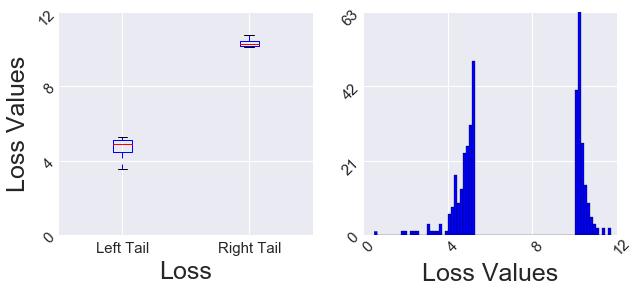

In [6]:
# list number of extreme values that may be interested to examine
lbond = log1pLoss.mean() - 3* log1pLoss.std()
ubond = log1pLoss.mean() + 3* log1pLoss.std()
print('Num of outliers: {}, which will be examed later.\n'.format(sum(log1pLoss<lbond)+sum(log1pLoss>ubond)))
# save the left tail and the right tail
outlierLTailDf = trainDf[(trainDf['log1pLoss']<lbond)]
outlierRTailDf = trainDf[(trainDf['log1pLoss']>ubond)]
# a first look of the outliers
print('Descriptive statistics of log1p(Loss) values of the left tail.\n')
desOutliers = outlierLTailDf['log1pLoss'].describe()
print(desOutliers)
print('\n')
print('Descriptive statistics of log1p(Loss) values of the right tail.\n')
desOutliers = outlierRTailDf['log1pLoss'].describe()
print(desOutliers)
print('\n')

# set the figure and axes
f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
# plot the tails
outlierLTLoss = outlierLTailDf['log1pLoss']
outlierRTLoss = outlierRTailDf['log1pLoss']
outlierTailTicks = (np.round(np.linspace(np.floor(outlierLTLoss.min()),np.ceil(outlierRTLoss.max()),num=4),
                         decimals=0).astype(int))
# outlierRTicks = (np.round(np.linspace(np.floor(outlierRTLoss.min()),np.ceil(outlierRTLoss.max()),num=4),
#                          decimals=0).astype(int))
# the boxplot
bplot = ax1.boxplot([outlierLTLoss.values, outlierRTLoss.values])
setBoxPlt(outlierTailTicks,ax1,'Loss','Loss Values',['Left Tail','Right Tail'])
# the histogram
hgram = ax2.hist(outlierLTLoss.append(outlierRTLoss),bins=80, color='b')
setHistPlt(outlierTailTicks,ax2,'Loss Values',hgram)

**Examine samples without outliers**

Num of legitimate samples: 187954, which will be examed later.

Descriptive statistics of log1p(Loss) values of the legitimate samples.

count    187954.000000
mean          7.686687
std           0.802027
min           5.252902
25%           7.095926
50%           7.657689
75%           8.258363
max          10.117657
Name: log1pLoss, dtype: float64




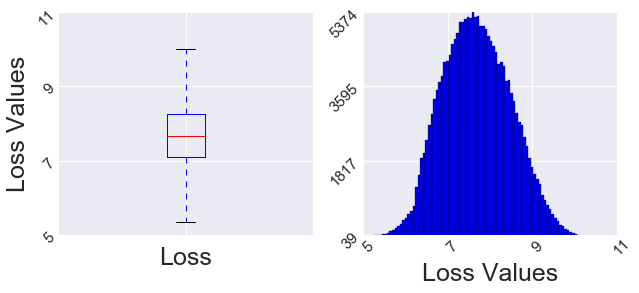

In [7]:
print('Num of legitimate samples: {}, which will be examed later.\n'.format(sum((log1pLoss>=lbond)&(log1pLoss<=ubond))))
# save legitimate samples
samplesDf = trainDf[(trainDf['log1pLoss']>=lbond) & (trainDf['log1pLoss']<=ubond)]
# a first look of the legitimate samples
print('Descriptive statistics of log1p(Loss) values of the legitimate samples.\n')
samplesLoss = samplesDf['log1pLoss']
desSamples = samplesLoss.describe()
print(desSamples)
print('\n')

# set the figure and axes
f,(ax1,ax2) = plt.subplots(1,2,figsize = (10,4))
# plot the tails

samplesTicks = (np.round(np.linspace(np.floor(samplesLoss.min()),np.ceil(samplesLoss.max()),num=4),
                         decimals=0).astype(int))
# the boxplot
bplot = ax1.boxplot(samplesLoss.values)
setBoxPlt(samplesTicks,ax1,'Loss','Loss Values')
# the histogram
hgram = ax2.hist(samplesLoss,bins=80, color='b')
setHistPlt(samplesTicks,ax2,'Loss Values',hgram)

# 2. Univariate Variable Analysis

**There is no duplication in user ids.**

In [8]:
# Check weather duplications exist in the total train.csv
print('There are {} in train.csv'.format(samplesDf['id'].size))
print('Are there any duplicated user ids? {}'.format(samplesDf['id'].duplicated().any()))

There are 187954 in train.csv
Are there any duplicated user ids? False


## 2.1 Categorical Features

**Categorical features with less than 20 levels**

Most of the categorical features have less than 20 levels. Frequencies for all of these features are plotted as follows.

In [275]:
# # take the categorical features to analyze
# catSampFt = samplesDf.select_dtypes(include=['object'])
# # compute levels of all the categorical variables

# # generate value frequencies for each categorical feature
# freqSamp1 = [catSampFt.groupby(col).size() for col in catSampFt.columns if len(catSampFt.groupby(col))<=30]
# freqSamp1Names = [sampK.index.name for sampK in freqSamp1 if len(sampK)<=30]
# freqSamp2 = [catSampFt.groupby(col).size() for col in catSampFt.columns if len(catSampFt.groupby(col))>30]
# freqSamp2Names = [sampK.index.name for sampK in freqSamp2 if len(sampK)>30]
# freqSamp1Df = pd.concat(freqSamp1, axis=1,keys = freqSamp1Names).sort_index().fillna(value=0).applymap(lambda x: x/len(trainDf))
# freqSamp2Df = pd.concat(freqSamp2, axis=1,keys = freqSamp2Names).sort_index().fillna(value=0).applymap(lambda x: x/len(trainDf))

In [293]:
# take the categorical features to analyze
# a function generate value frequencies for each categorical feature
def SelCatShort(catSampFt):    
    freqSamp1 = [catSampFt.groupby(col).size() for col in catSampFt.columns if len(catSampFt.groupby(col))<=30]
    freqSamp1Names = [sampK.index.name for sampK in freqSamp1 if len(sampK)<=30]
    freqSamp2 = [catSampFt.groupby(col).size() for col in catSampFt.columns if len(catSampFt.groupby(col))>30]
    freqSamp2Names = [sampK.index.name for sampK in freqSamp2 if len(sampK)>30]
    freqSamp1Df = pd.concat(freqSamp1, axis=1,keys = freqSamp1Names).sort_index().fillna(value=0).applymap(lambda x: x/len(catSampFt))
    freqSamp2Df = pd.concat(freqSamp2, axis=1,keys = freqSamp2Names).sort_index().fillna(value=0).applymap(lambda x: x/len(catSampFt))
    return freqSamp1Df,freqSamp2Df
# select short categorical features for samples without outliers
catSampFt = samplesDf.select_dtypes(include=['object'])
freqSamp1Df,freqSamp2Df = SelCatShort(catSampFt)
# select short categorical features for outliers in left tail
catLTailFt = outlierLTailDf.select_dtypes(include=['object'])
freqLTail1Df,freqLTail2Df = SelCatShort(catLTailFt)
# select short categorical features for outliers in right tail
catRTailFt = outlierRTailDf.select_dtypes(include=['object'])
freqRTail1Df,freqRTail2Df = SelCatShort(catRTailFt)

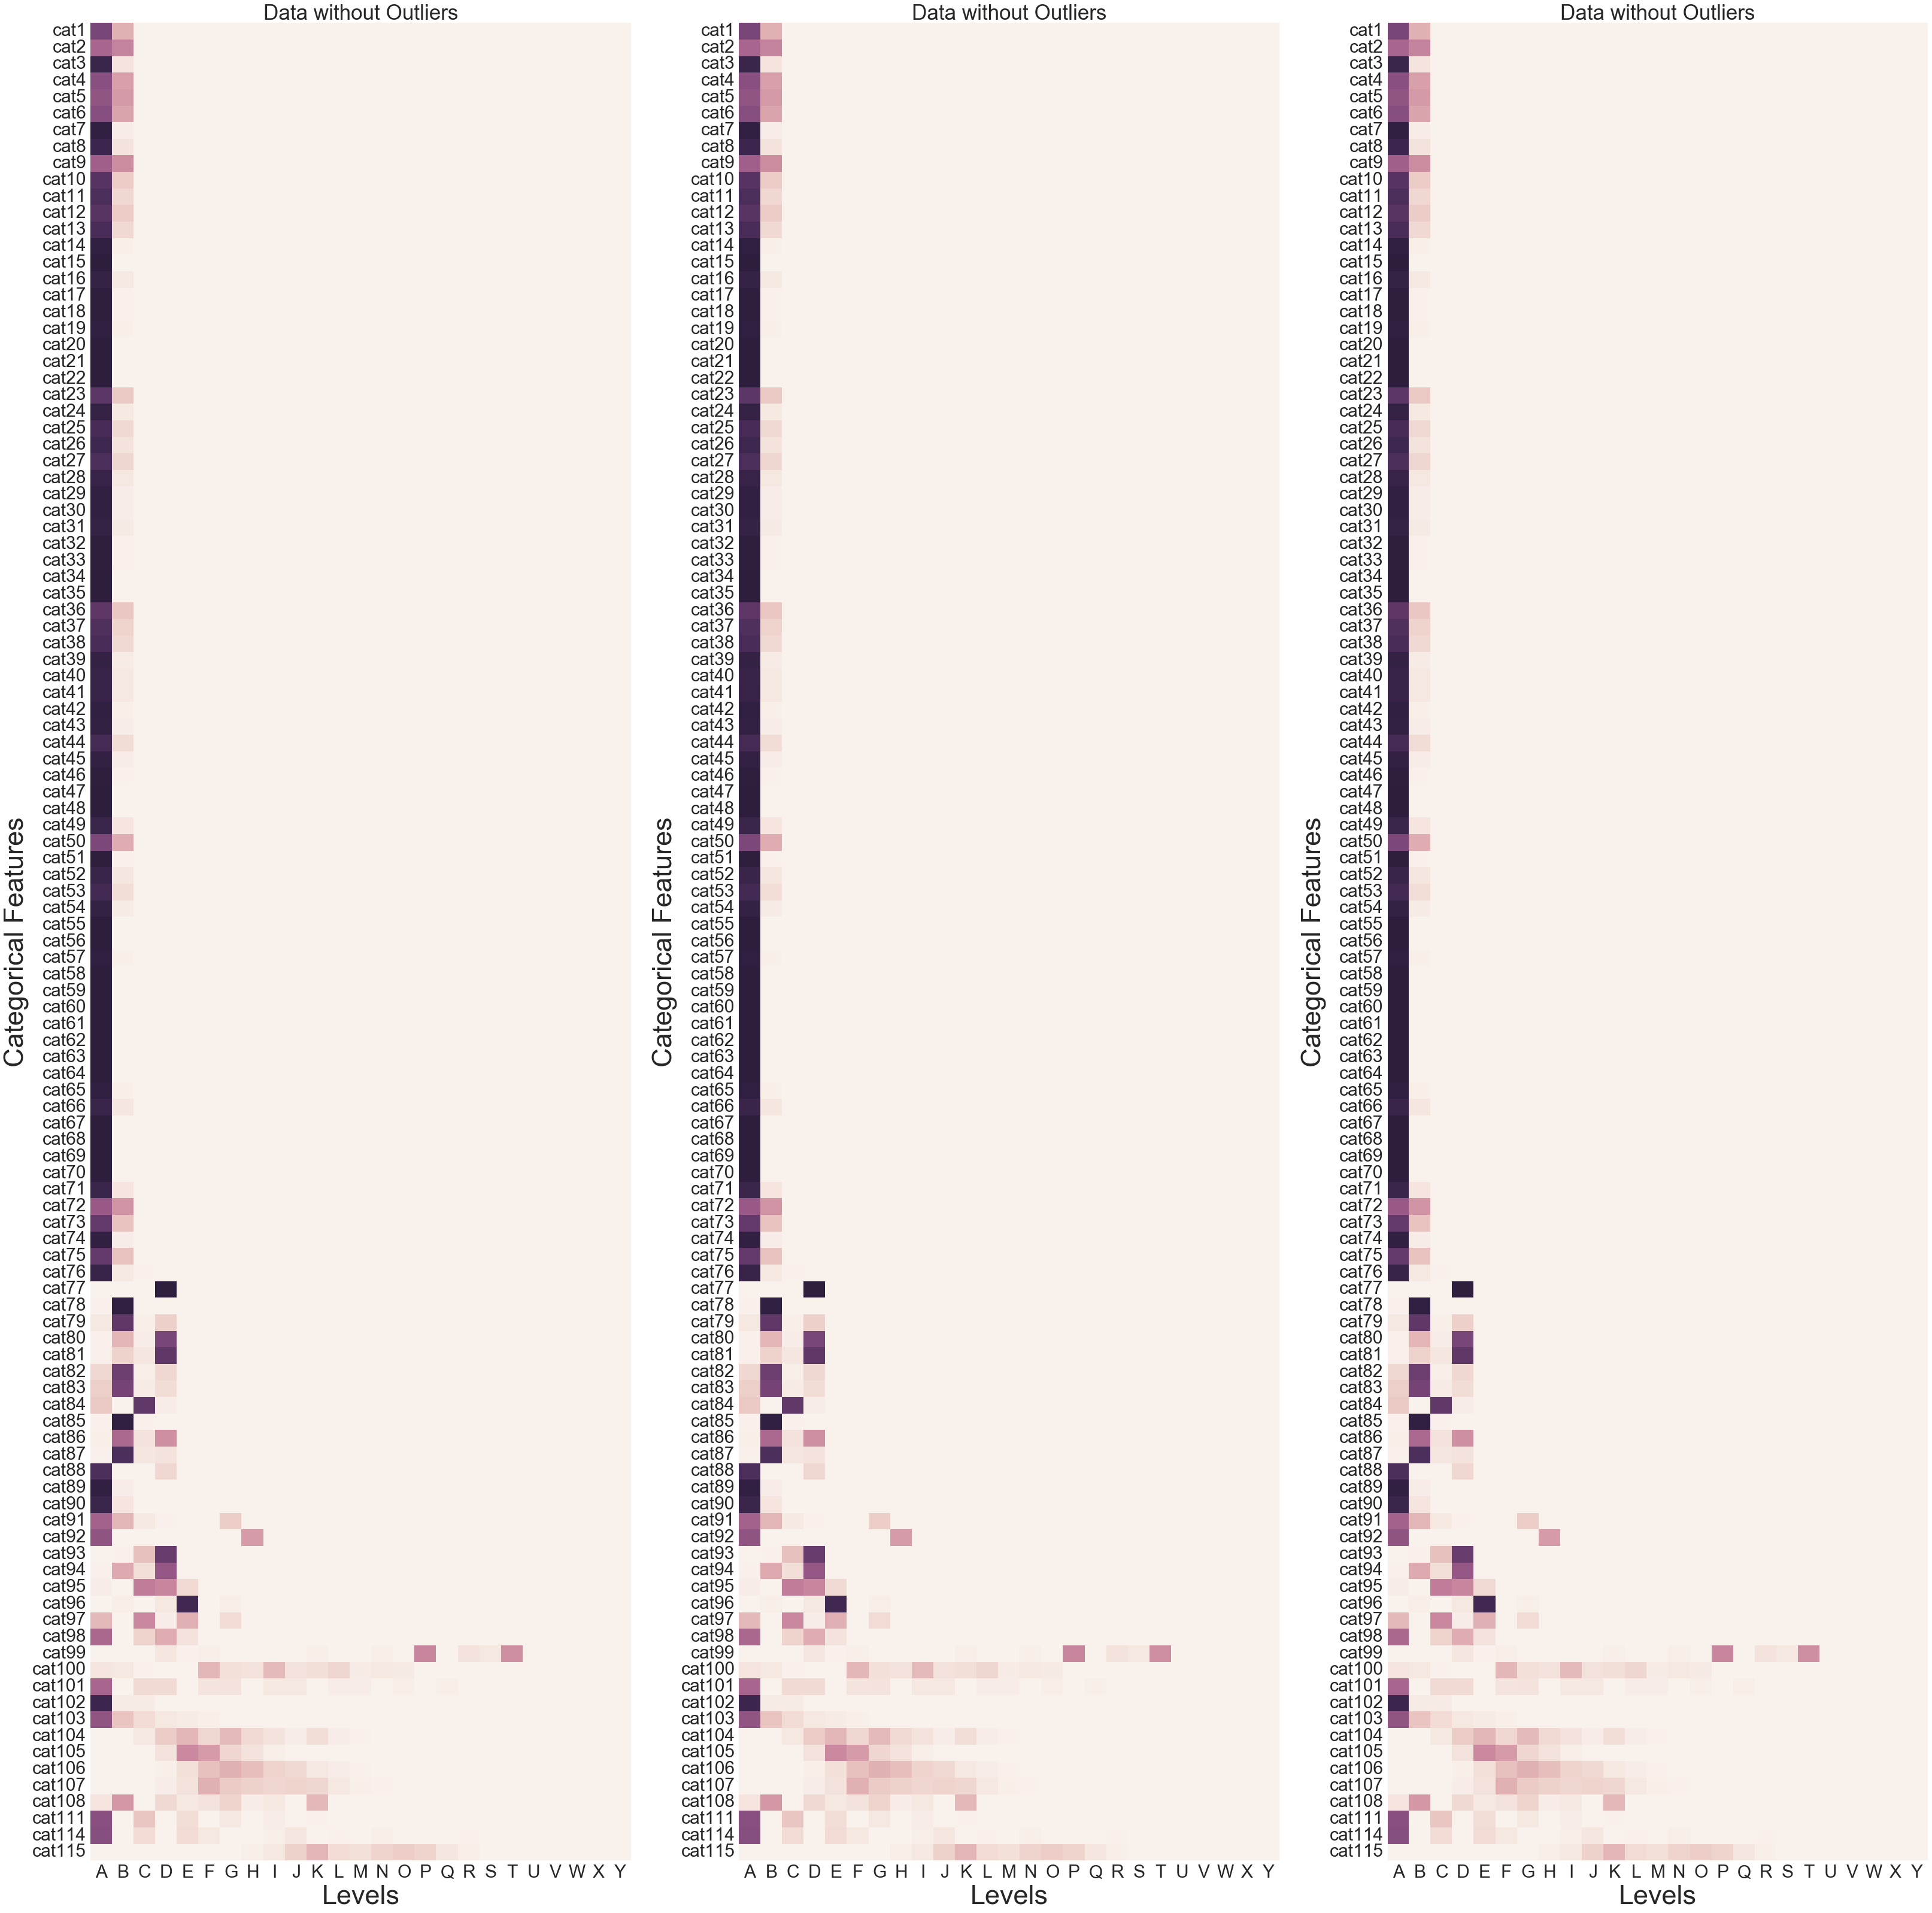

In [287]:
# visualize the short frequency table as a 
from mpl_toolkits.axes_grid1 import make_axes_locatable
# set up my heatmap
def setHeatmap(ax,xticklab,yticklab,title,xlab='',ylab='',cbarLabel='',
               cbarTick=[0.0,0.25,0.5,0.75,1.0],cbarTickLabels=['0%','25%','50%','75%','100%']):
    ax.set_xlabel(xlab,fontsize=45)
    ax.set_xticklabels(xticklab,fontsize = 30);
    ax.set_ylabel(ylab,fontsize=45)
    ax.set_yticklabels(yticklab,fontsize =30);
    ax.set_title(title,fontsize = 35)
#     if cbarLabel!='':
#         cbar = ax.collections[0].colorbar
#         cbar.set_label(cbarLabel,fontsize=45)
#         cbar.set_ticks(cbarTick)
#         cbar.set_ticklabels(cbarTickLabels)
#         cbar.ax.set_yticklabels(cbarTickLabels,fontsize=25)

# plot the heatmap of frequency table for features with less than 26 levels
freqDfList = [freqSamp1Df,freqLTail1Df,freqRTail1Df]
fg,axn=plt.subplots(1,3,figsize = (55,55))
for ax in axn:
    hhmap = sns.heatmap(freqSamp1Df.T,ax=ax,cbar=False);
    setHeatmap(ax=ax,yticklab = freqSamp1Df.columns[::-1], xticklab = freqSamp1Df.index, 
               title = 'Data without Outliers', ylab = 'Categorical Features',xlab='Levels')
cbar = ax.collections[0].colorbar

**Outliers**

As follows

In [296]:
freqRTail1Df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat111,cat114,cat115
A,0.964245,0.299654,0.816148,0.541869,0.519954,0.785467,0.734487,0.883737,0.335871,0.577624,...,0.519954,0.000923,0.000923,0.000923,0.000923,0.034371,0.000000,0.541869,0.785467,0.000923
AB,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009227,0.000000,0.000000,0.000000
AS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000231,0.000000,0.000000,0.000000
B,0.035755,0.700346,0.183852,0.458131,0.480046,0.214533,0.265513,0.116263,0.664129,0.422376,...,0.200692,0.000000,0.000000,0.000231,0.000231,0.190081,0.000000,0.000000,0.000000,0.000231
BI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.973472,0.000000,0.000000,0.000000
BU,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006690,0.000000,0.000000,0.000000
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.119493,0.020761,0.000923,0.003922,0.000231,0.000461,0.000231,0.204844,0.039908,0.000000
CL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004383,0.000000,0.000000,0.000000
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070819,0.084198,0.032526,0.033218,0.011303,0.235755,0.000000,0.000231,0.000000,0.000231
E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.046597,0.193080,0.240830,0.139792,0.062514,0.103345,0.000000,0.099885,0.042676,0.001384


In [294]:
freqLTail1Df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat111,cat114,cat115
A,0.603774,0.799769,0.983442,0.7732,0.759338,0.568733,0.992684,0.962264,0.820562,0.983827,...,0.962264,0.759338,0.000770,0.000000,0.000000,0.000000,0.047362,0.773200,0.568733,0.000000
B,0.396226,0.200231,0.016558,0.2268,0.240662,0.431267,0.007316,0.037736,0.179438,0.016173,...,0.017713,0.185984,0.000385,0.000000,0.000000,0.000000,0.404698,0.000000,0.000000,0.000000
C,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018483,0.040046,0.036196,0.003466,0.000770,0.002695,0.003080,0.180593,0.190219,0.000000
D,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000770,0.010782,0.142857,0.078167,0.003466,0.025799,0.077397,0.000000,0.000000,0.000000
E,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000770,0.003466,0.249519,0.433192,0.047362,0.081248,0.025414,0.030035,0.184059,0.000000
F,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.100501,0.326916,0.161725,0.267231,0.060839,0.000000,0.021563,0.000385
G,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000385,0.205622,0.103966,0.258375,0.125529,0.087794,0.011937,0.000000,0.000770
H,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.117828,0.044282,0.239507,0.106276,0.010012,0.000000,0.000000,0.013862
I,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.058914,0.007316,0.117058,0.098960,0.035040,0.003851,0.003851,0.040816
J,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011937,0.002310,0.096650,0.108972,0.000000,0.000000,0.024644,0.133231


In [295]:
freqSamp1Df

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat111,cat114,cat115
A,0.748691,0.569752,0.947708,0.683834,0.658877,0.699122,0.981233,0.942432,0.603878,0.85538,...,0.942432,0.658877,0.000342,0.000402,0.000391,0.000391,0.049767,0.683834,0.699122,0.000391
B,0.251309,0.430248,0.052292,0.316166,0.341123,0.300878,0.018767,0.057568,0.396122,0.14462,...,0.026898,0.176359,0.000232,0.000028,0.000044,0.000006,0.350837,0.000039,0.000033,0.000006
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.025801,0.087581,0.037296,0.001444,0.000606,0.001130,0.002812,0.171149,0.088904,0.000006
D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.002266,0.041188,0.148165,0.065209,0.009819,0.017140,0.098889,0.000011,0.000028,0.000017
E,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.002475,0.023497,0.228463,0.409756,0.067651,0.066372,0.041095,0.078126,0.087173,0.000028
F,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000066,0.007906,0.101640,0.333664,0.189960,0.250527,0.054999,0.000017,0.042655,0.001307
G,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000061,0.002773,0.214719,0.108151,0.250626,0.151853,0.114005,0.037032,0.000006,0.001632
H,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000965,0.091666,0.058935,0.201079,0.125131,0.022334,0.000000,0.000000,0.014560
I,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000507,0.057915,0.014830,0.114617,0.107142,0.038856,0.018623,0.013016,0.037506
J,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000198,0.016413,0.003352,0.098133,0.118488,0.001059,0.000000,0.044182,0.125715
